In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

# EDA

В этой тетрадке мы провели небольшой анализ нашего датафрема.

In [2]:
gk_attributes = pd.read_csv('gk_attributes.csv') # https://disk.yandex.ru/d/9ASazKr_C2cUgg
gk_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14836 entries, 0 to 14835
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      14836 non-null  int64  
 1   player_name     14836 non-null  object 
 2   height          14836 non-null  float64
 3   weight          14836 non-null  int64  
 4   age             14836 non-null  int64  
 5   player_api_id   14836 non-null  int64  
 6   date            14836 non-null  object 
 7   overall_rating  14778 non-null  float64
 8   sprint_speed    14778 non-null  float64
 9   gk_diving       14778 non-null  float64
 10  gk_handling     14778 non-null  float64
 11  gk_kicking      14778 non-null  float64
 12  gk_positioning  14778 non-null  float64
 13  gk_reflexes     14778 non-null  float64
dtypes: float64(8), int64(4), object(2)
memory usage: 1.6+ MB


In [3]:
fl_attributes = pd.read_csv('fl_attributes.csv')
fl_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167613 entries, 0 to 167612
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      167613 non-null  int64  
 1   player_name     167613 non-null  object 
 2   height          167613 non-null  float64
 3   weight          167613 non-null  int64  
 4   age             167613 non-null  int64  
 5   player_api_id   167613 non-null  int64  
 6   date            167613 non-null  object 
 7   overall_rating  166852 non-null  float64
 8   dribbling       165396 non-null  float64
 9   pace            166852 non-null  float64
 10  shooting        165396 non-null  float64
 11  passing         165396 non-null  float64
 12  defending       165396 non-null  float64
 13  physical        165396 non-null  float64
dtypes: float64(8), int64(4), object(2)
memory usage: 17.9+ MB


In [4]:
gk_attributes.drop(columns=['player_api_id', 'date', 'player_name', 'Unnamed: 0'], inplace=True)
gk_attributes.head()

height  weight  age  overall_rating  sprint_speed  gk_diving  gk_handling  \
0   190.5     181   23            48.0          26.0       53.0         41.0   
1   190.5     181   22            48.0          26.0       53.0         41.0   
2   190.5     181   21            48.0          26.0       53.0         41.0   
3   190.5     181   21            48.0          26.0       53.0         41.0   
4   190.5     181   21            48.0          26.0       53.0         41.0   

   gk_kicking  gk_positioning  gk_reflexes  
0        39.0            51.0         53.0  
1        39.0            51.0         53.0  
2        39.0            51.0         53.0  
3        39.0            51.0         53.0  
4        39.0            51.0         53.0

In [5]:
fl_attributes.drop(columns=['player_api_id', 'date', 'player_name', 'Unnamed: 0'], inplace=True)
fl_attributes.head()

height  weight  age  overall_rating  dribbling  pace  shooting  passing  \
0  182.88     187   23            67.0      51.80  62.2     44.65    55.75   
1  182.88     187   23            67.0      51.80  62.2     44.65    55.75   
2  182.88     187   23            62.0      51.80  62.2     44.65    55.75   
3  182.88     187   23            61.0      50.95  62.2     43.65    54.75   
4  182.88     187   14            61.0      50.95  62.2     43.65    54.75   

   defending  physical  
0       68.2     72.15  
1       68.2     72.15  
2       61.5     70.15  
3       59.1     69.90  
4       59.1     69.90

Рассмотрим данные вратарей 

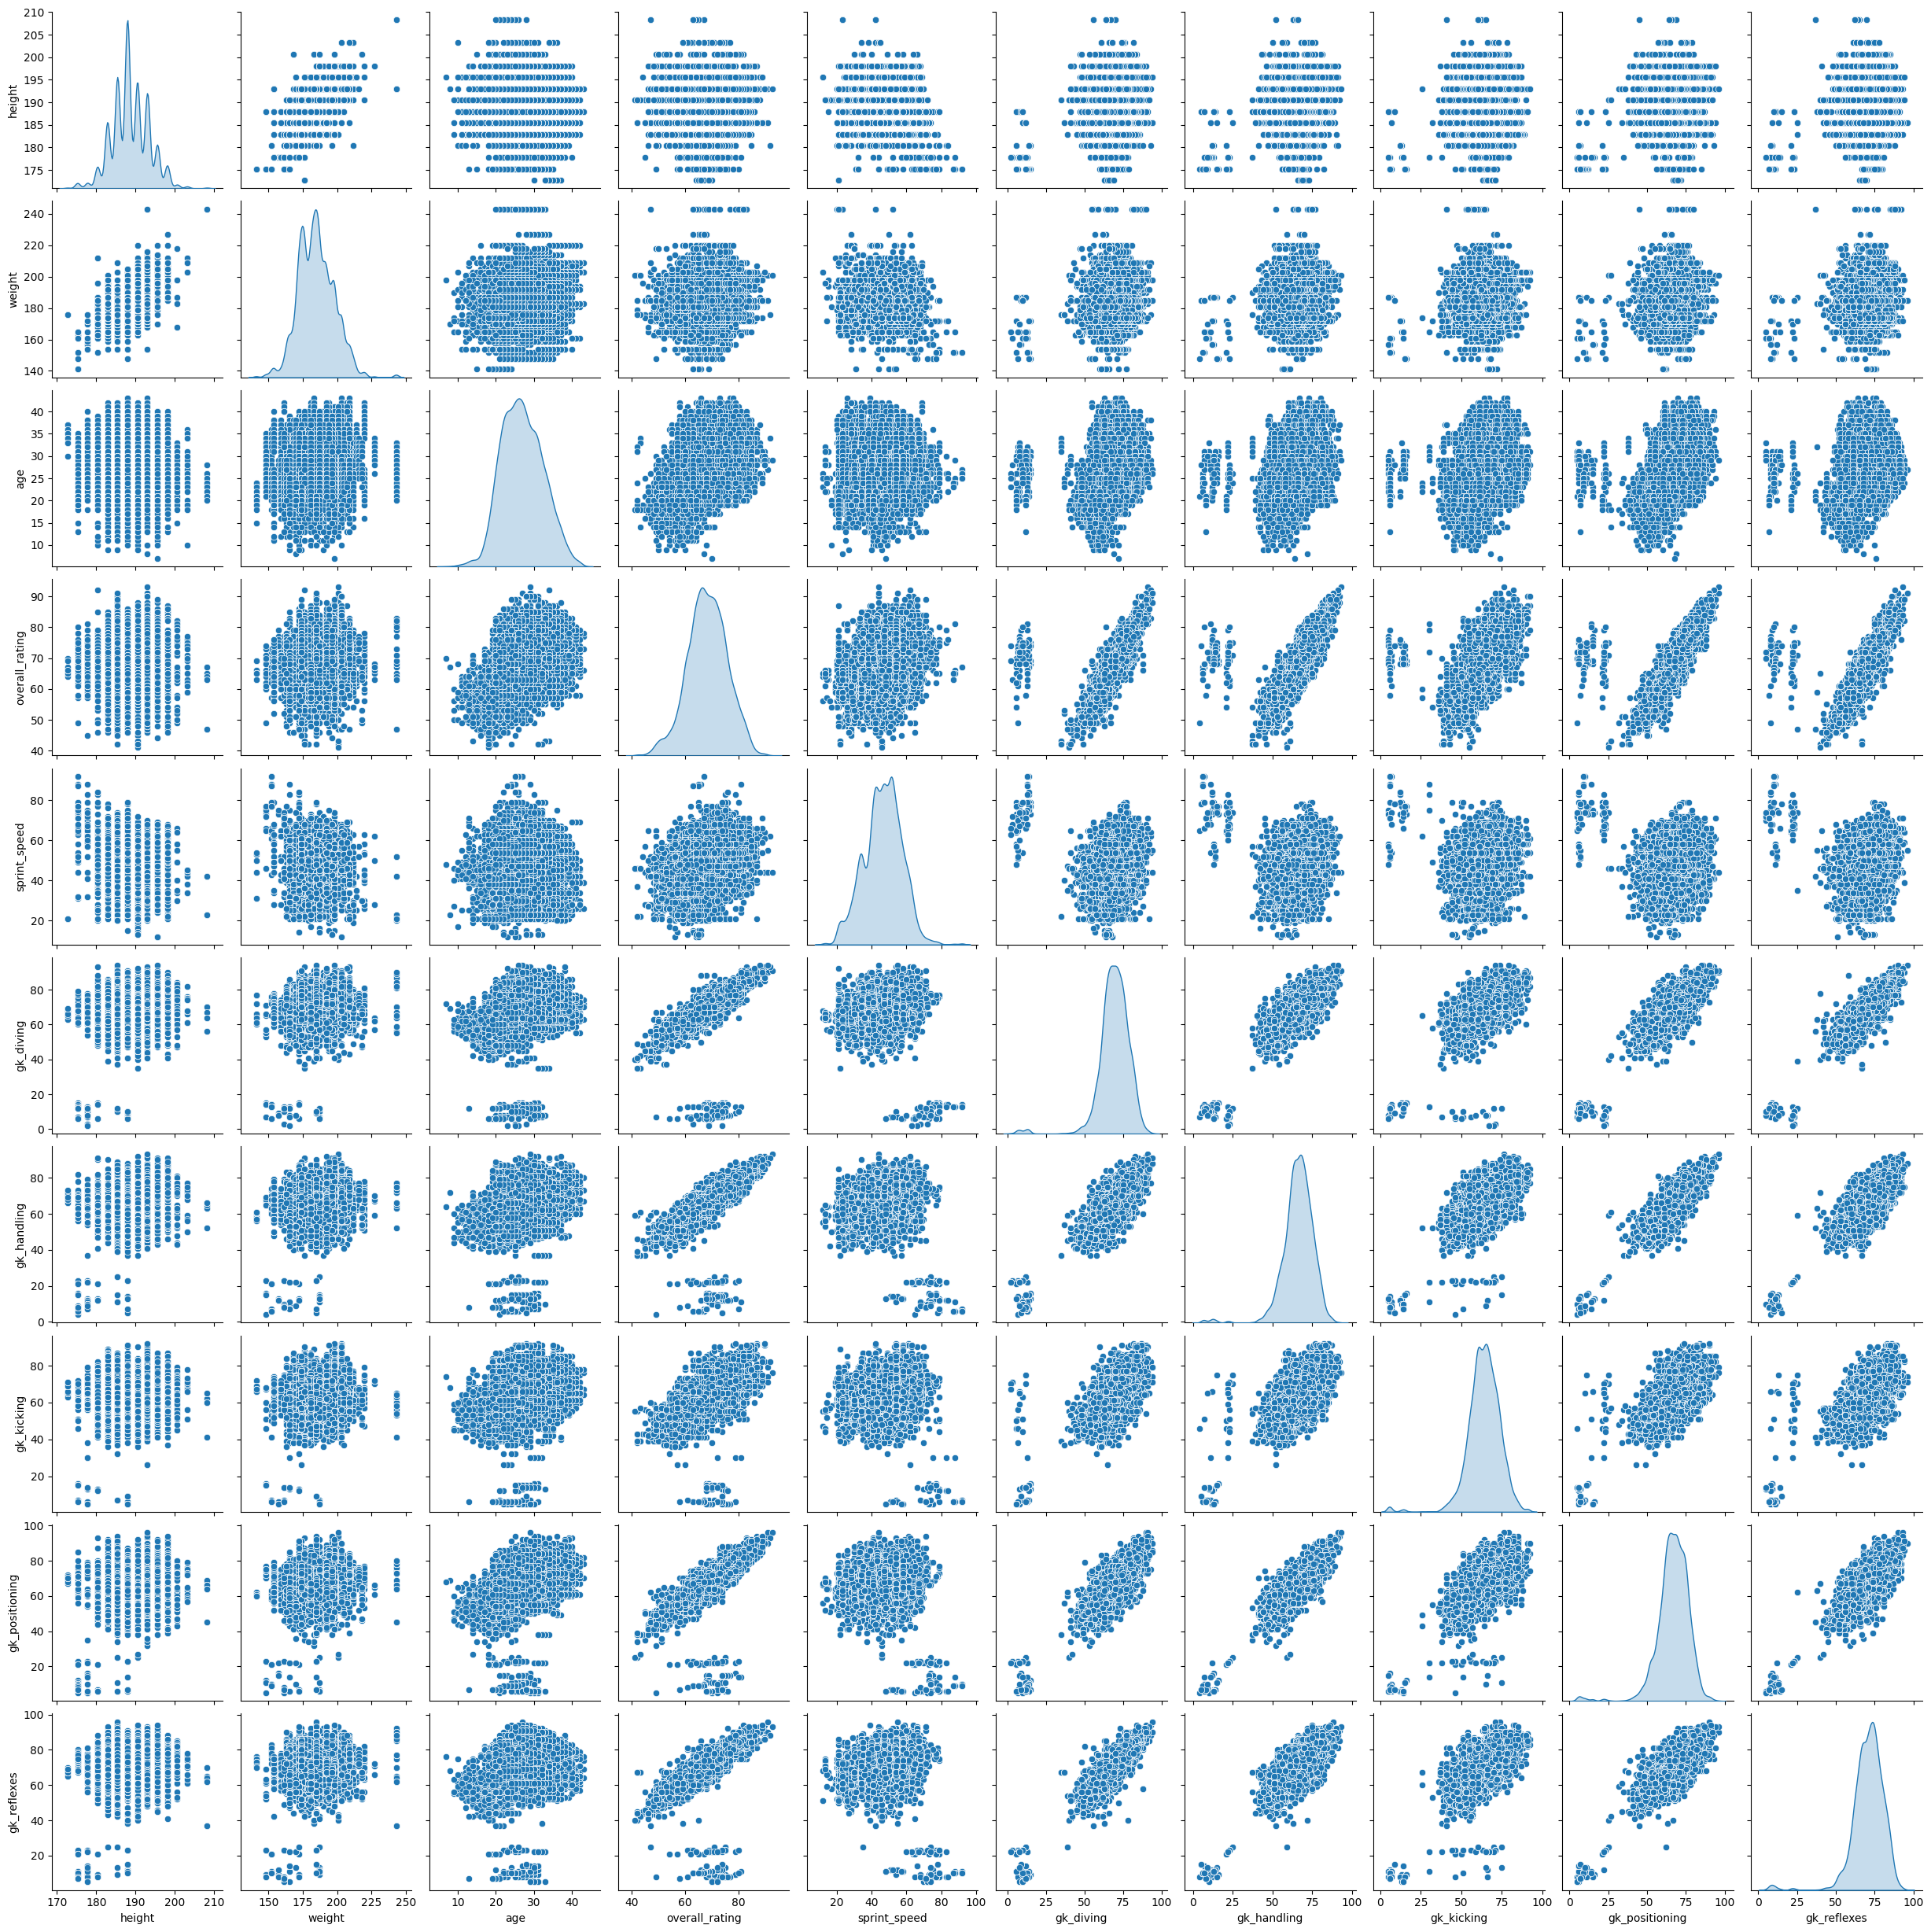

In [6]:
sns.pairplot(gk_attributes, diag_kind='kde')
plt.show()

Тут мы видим линейную связь между многими признаками. Стоит отметить, что в каждом из признаков есть небольшие группы низких значений, которые сильно выделяются из общей массы. Видимо в данных матчах на ворота ставили полевых игроков.

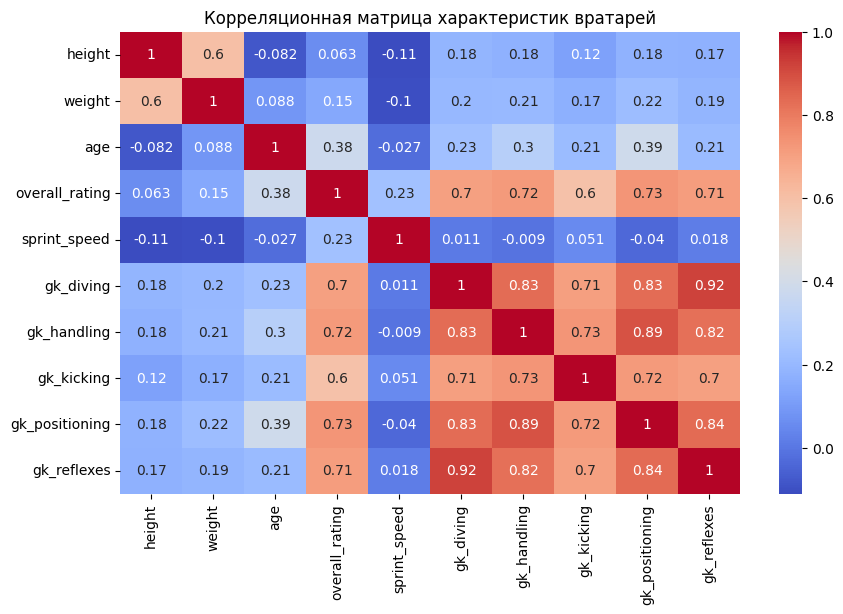

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(gk_attributes.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица характеристик вратарей')
plt.show()

Мы видим, что рост, вес и возраст вратаря практически не связаны с его показателями. Между остальными показателями мы видим высокую корреляцию, так как они очевидно будут влиять друг на друга.

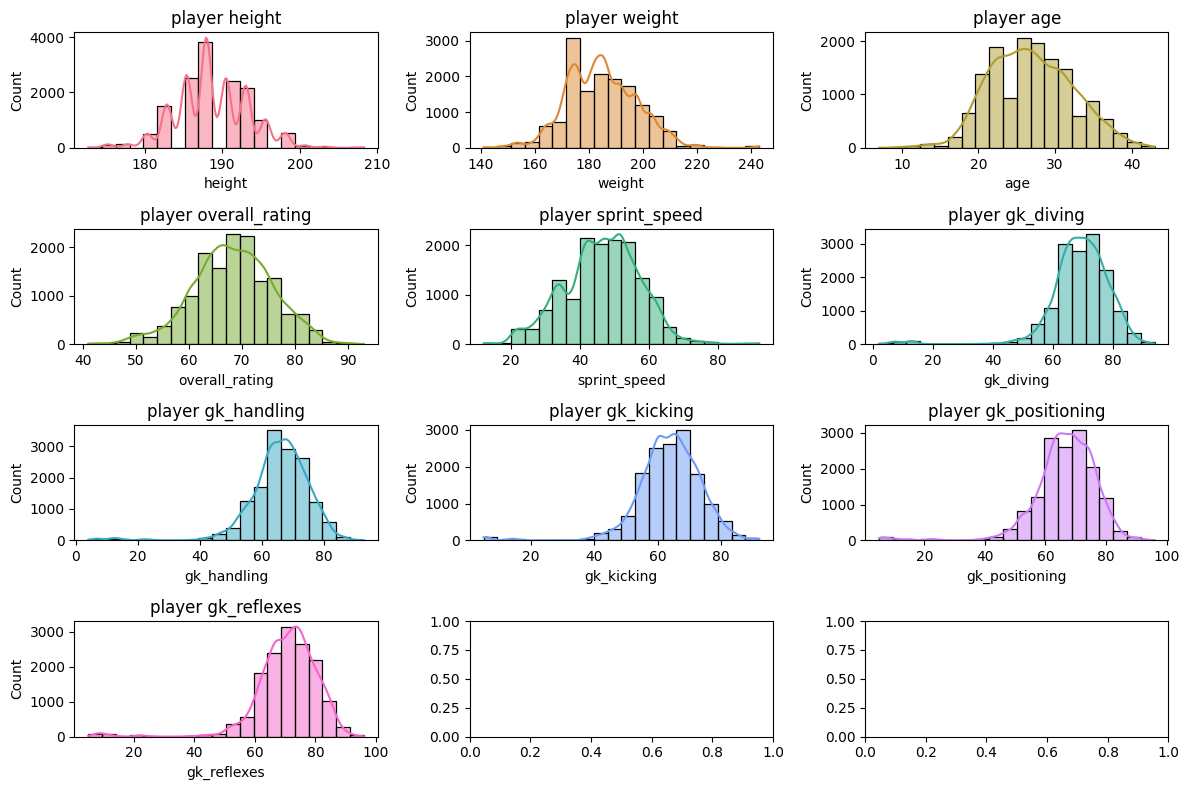

In [8]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 8))

colors = sns.color_palette('husl', n_colors=10)

for i, column in enumerate(gk_attributes.columns):
    row_index = i // 3  
    col_index = i % 3   
    sns.histplot(data=gk_attributes,bins=20, x=column, ax=axes[row_index, col_index], kde=True, color=colors[i])
    axes[row_index, col_index].set_title(f'player {column}')

plt.tight_layout()
plt.show()

Тут мы видим, что данные распределены нормально. Тут мы также видим влияние плохих вратарей на всю выборку. 

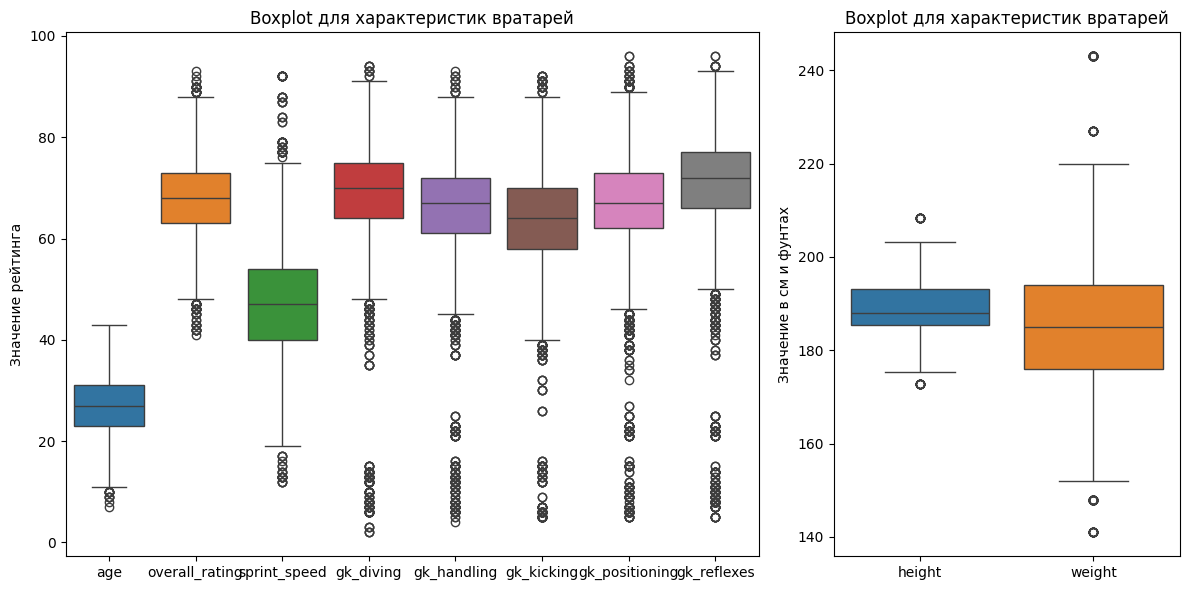

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [2, 1]})


sns.boxplot(data=gk_attributes.drop(columns=['height', 'weight'], inplace=False), ax=axs[0])
axs[0].set_title('Boxplot для характеристик вратарей')
axs[0].set_ylabel('Значение рейтинга')

sns.boxplot(gk_attributes[['height', 'weight']], ax=axs[1])
plt.title('Boxplot для характеристик вратарей')
plt.ylabel('Значение в см и фунтах')

plt.tight_layout()
plt.show()

У игроков совпадают большинство средних значений по их показателям. На этом фоне выделяется скорость игроков. Ее среднее значение в вратарей гораздо ниже, чем у остальных признаков. Также, если мы посмотрим на боксплот полевых игроков, то мы видим что вратари гораздо больше и тяжелее среднего полевого игрока.

Теперь рассмотрим характеристики игроков 

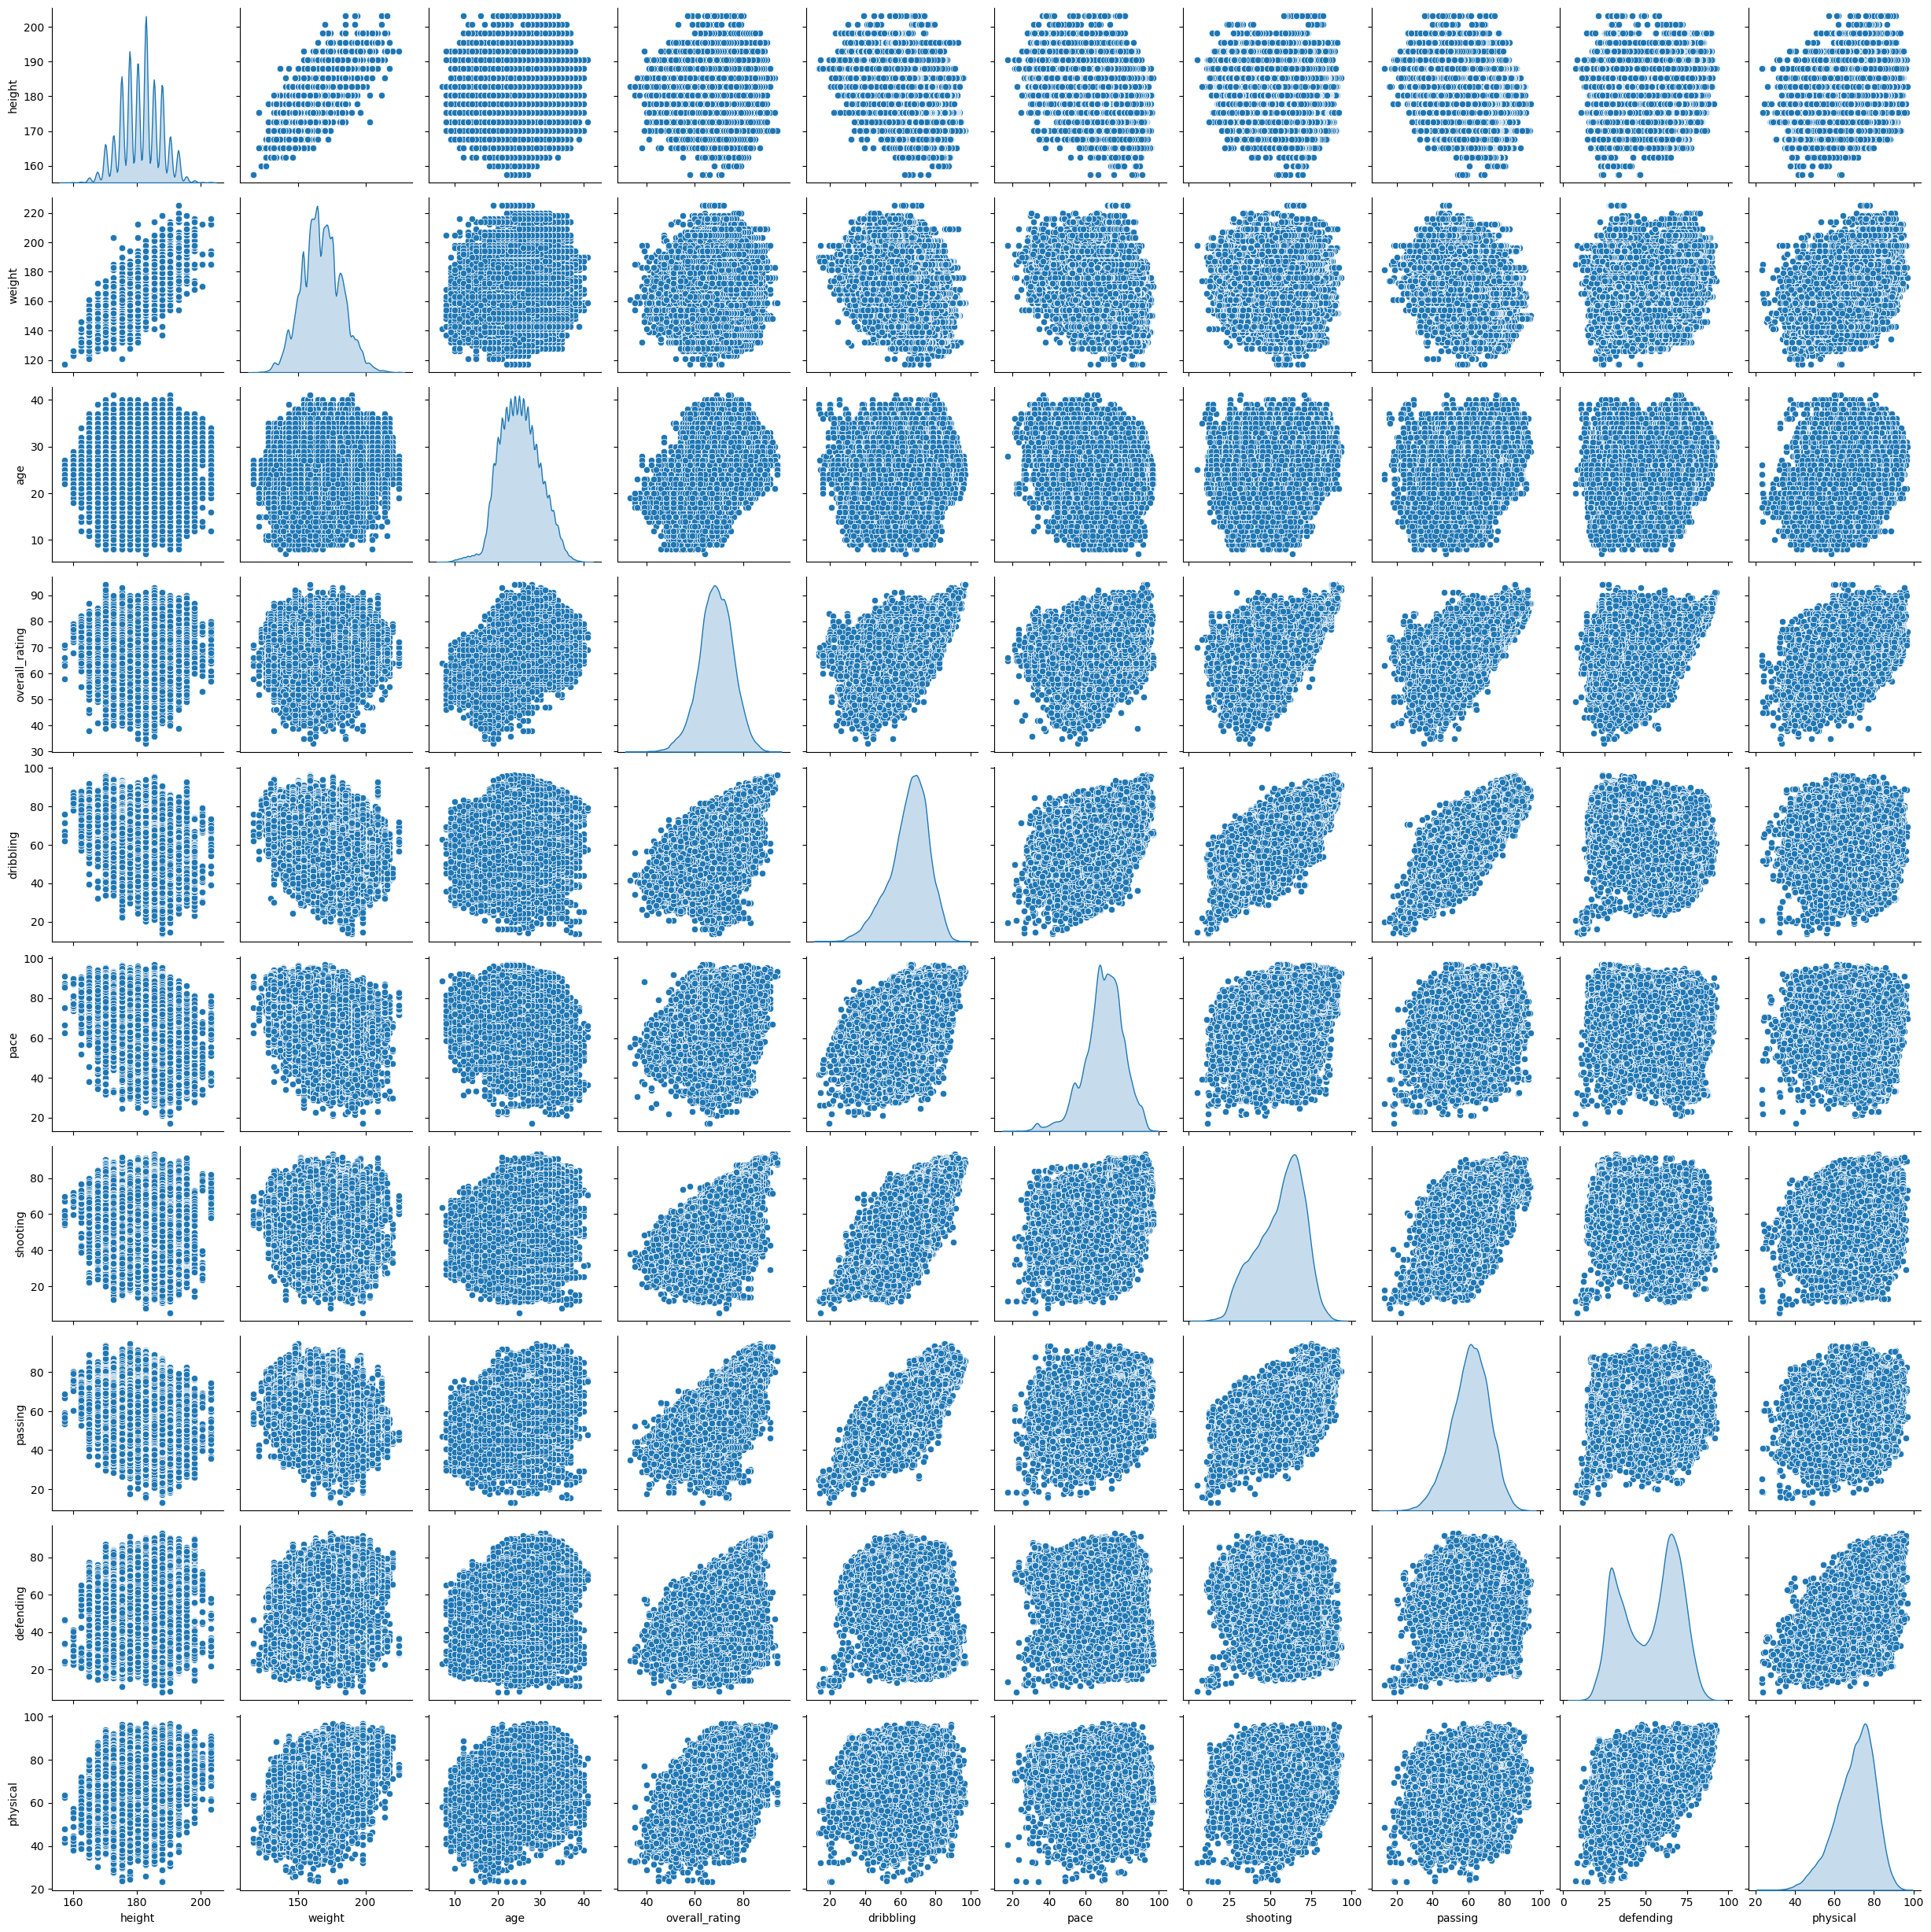

In [10]:
sns.pairplot(fl_attributes, diag_kind='kde',)
plt.show()

Тут мы не видим ничего интересного. Какой-то связи у большей части признаков практически нет. Облака точек имеют круглую форму. 

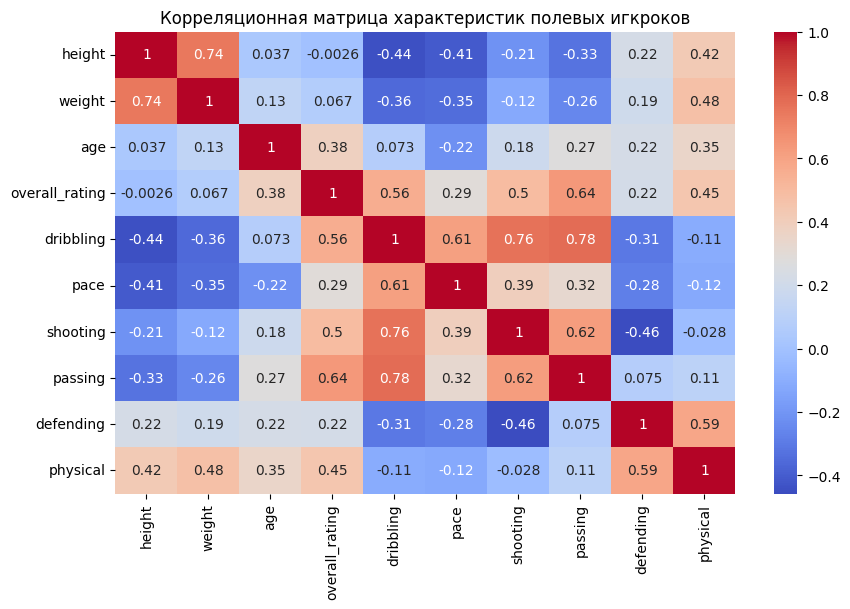

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(fl_attributes.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица характеристик полевых игкроков')
plt.show()

Корреляционная матрица подтверждает то, что мы заметили, посмотрев на облака точек. Связи большей части признаков нет. Но стоит отметить, что игроки с хорошим дриблингом обычно имеют хорошие удары и пасы.

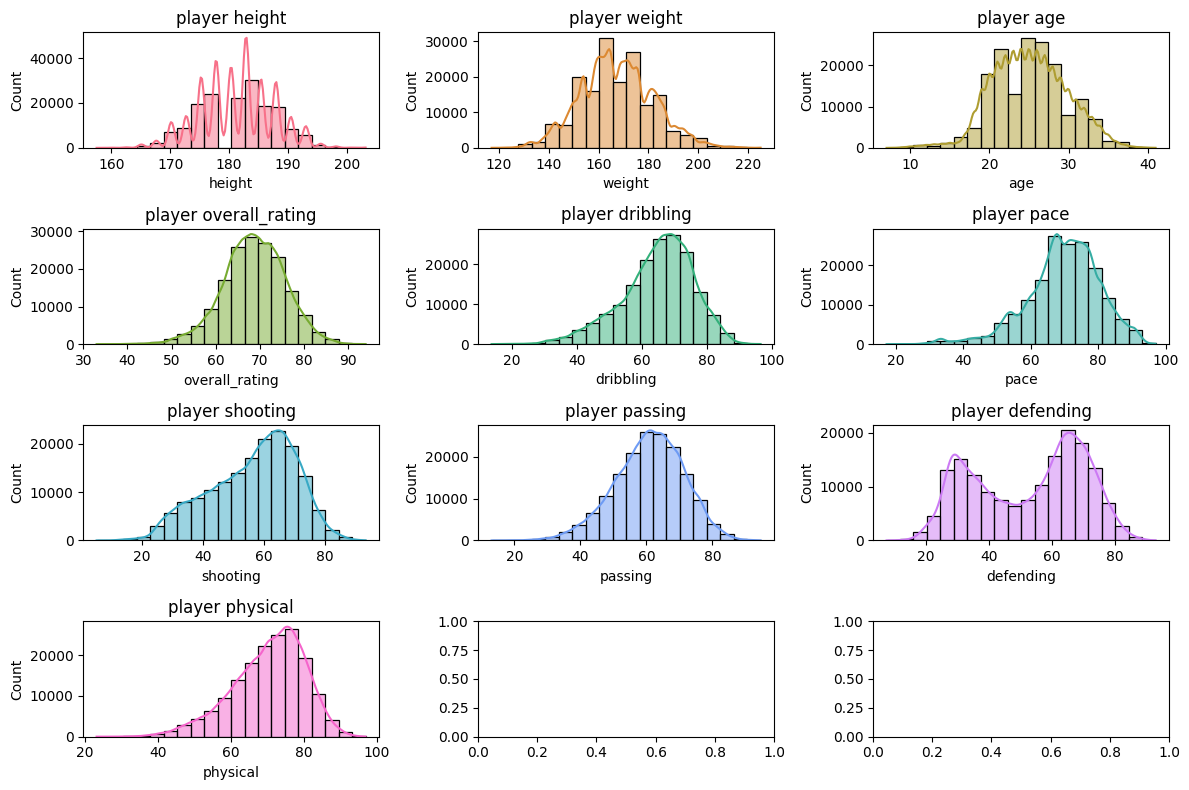

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 8))

colors = sns.color_palette('husl', n_colors=10)

for i, column in enumerate(fl_attributes.columns):
    row_index = i // 3  
    col_index = i % 3   
    sns.histplot(data=fl_attributes,bins=20, x=column, ax=axes[row_index, col_index], kde=True, color=colors[i])
    axes[row_index, col_index].set_title(f'player {column}')

plt.tight_layout()
plt.show()

На гистограммах у полевых игроков мы видим более типичное нормальное распределение, по сравнению с гистограммами вратарей. На гистограмме, которая показывает навыки защиты, мы видим две моды, так как в полевых игроках у нас есть и защитники, и нападающие.

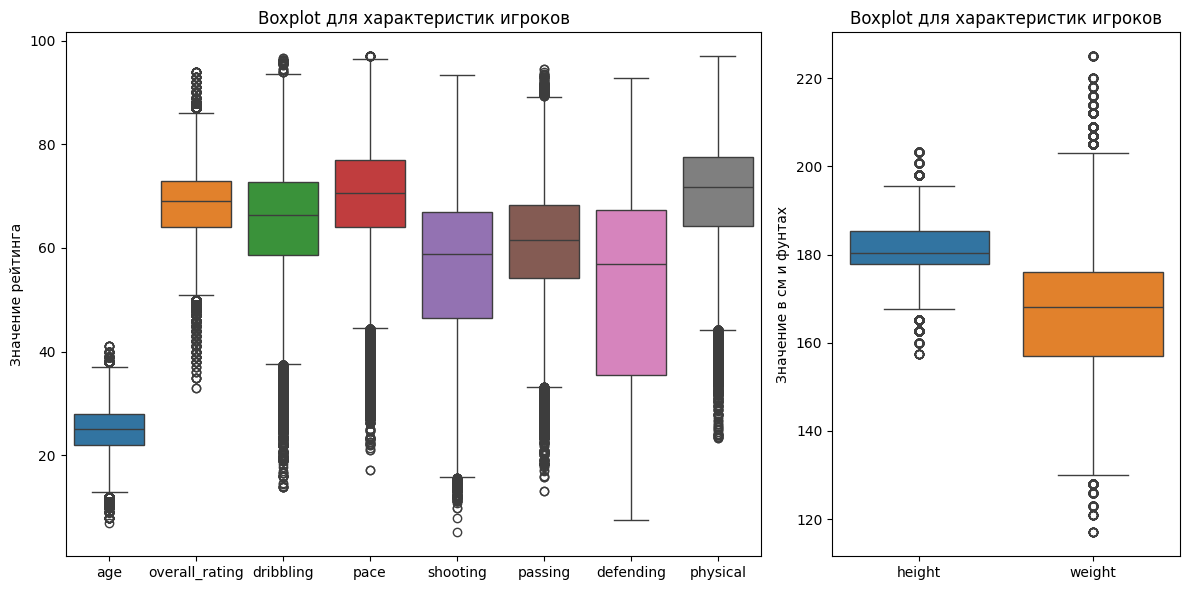

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [2, 1]})


sns.boxplot(data=fl_attributes.drop(columns=['height', 'weight'], inplace=False), ax=axs[0])
axs[0].set_title('Boxplot для характеристик игроков')
axs[0].set_ylabel('Значение рейтинга')

sns.boxplot(fl_attributes[['height', 'weight']], ax=axs[1])
plt.title('Boxplot для характеристик игроков')
plt.ylabel('Значение в см и фунтах')

plt.tight_layout()
plt.show()

На боксплотах игроков, мы видим гораздо больший разброс средних значений, по сравнению с вратарями. Также в характеристиках полевых игроков мы видим большее количество выбросов. Можно также отметить, что средний рост игрока сильно меньше его веса.

In [14]:
match = pd.read_csv('match.csv')

In [15]:
match.head()

Unnamed: 0.1  Unnamed: 0             league_name    away_team_name  \
0             0         761  Belgium Jupiler League         Lierse SK   
1             1         762  Belgium Jupiler League       KV Oostende   
2             2         763  Belgium Jupiler League          KAA Gent   
3             3         764  Belgium Jupiler League  Waasland-Beveren   
4             4         765  Belgium Jupiler League  Waasland-Beveren   

     home_team_name     season  stage        date  match_api_id  \
0  Waasland-Beveren  2013/2014      1  2014-03-29       1677179   
1          KAA Gent  2013/2014      1  2014-03-29       1677180   
2         Lierse SK  2013/2014      2  2014-04-05       1677181   
3       KV Oostende  2013/2014      2  2014-04-05       1677182   
4          KAA Gent  2013/2014      3  2014-04-12       1677183   

   home_team_goal  ...  weight_ap11  age_ap11  overall_rating_ap11  \
0               2  ...          146      20.0                 62.0   
1               0  ...          174      24.0                 62.0   
2               1  ...          152      24.0                 69.0   
3               0  ...          168      26.0                 67.0   
4               2  ...          168      26.0                 67.0   

   dribbling_ap11  preferred_foot_right_ap11  pace_ap11  shooting_ap11  \
0           67.45                          0      71.60          49.75   
1           59.15                          1      63.20          64.60   
2           73.10                          0      87.45          61.10   
3           68.70                          1      83.90          62.75   
4           68.70                          1      83.90          62.75   

   passing_ap11  defending_ap11  physical_ap11  
0         55.65            31.5          47.35  
1         61.55            35.2          70.25  
2         59.55            29.8          53.50  
3         53.35            31.1          72.45  
4         53.35            31.1          72.45  

[5 rows x 251 columns]

In [16]:
match.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'match_api_id'], inplace=True)

считаем что размер фрейма нас удволетворяет

In [17]:
match.shape

(8745, 248)

сделаем таргет перемнную и пока избавимся от всех названий (они не нужны в ml файле)

In [18]:
match.drop(columns=['league_name', 'away_team_name', 'home_team_name', 'season', 'date'], inplace=True)

In [19]:
match.head()

stage  home_team_goal  away_team_goal  height_hp1  weight_hp1  age_hp1  \
0      1               2               0      185.42         183     21.0   
1      1               0               1      187.96         181     21.0   
2      2               1               0      193.04         192     23.0   
3      2               0               0      185.42         190     31.0   
4      3               2               1      187.96         181     21.0   

   overall_rating_hp1  sprint_speed_hp1  gk_diving_hp1  gk_handling_hp1  ...  \
0                68.0              43.0           72.0             63.0  ...   
1                69.0              27.0           69.0             65.0  ...   
2                65.0              29.0           69.0             64.0  ...   
3                68.0              43.0           71.0             63.0  ...   
4                69.0              27.0           69.0             65.0  ...   

   weight_ap11  age_ap11  overall_rating_ap11  dribbling_ap11  \
0          146      20.0                 62.0           67.45   
1          174      24.0                 62.0           59.15   
2          152      24.0                 69.0           73.10   
3          168      26.0                 67.0           68.70   
4          168      26.0                 67.0           68.70   

   preferred_foot_right_ap11  pace_ap11  shooting_ap11  passing_ap11  \
0                          0      71.60          49.75         55.65   
1                          1      63.20          64.60         61.55   
2                          0      87.45          61.10         59.55   
3                          1      83.90          62.75         53.35   
4                          1      83.90          62.75         53.35   

   defending_ap11  physical_ap11  
0            31.5          47.35  
1            35.2          70.25  
2            29.8          53.50  
3            31.1          72.45  
4            31.1          72.45  

[5 rows x 243 columns]

In [20]:
match['goals_diff'] = match['home_team_goal'] - match['away_team_goal']

In [21]:
match.drop(columns=['home_team_goal', 'away_team_goal'], inplace=True)

In [22]:
match.to_csv('match_ml.csv')